<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/M%C3%A9todo_de_Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Colocación

A continuación se aplicara el **método de colocación polinómica** para poder aproximar la solución del problema de valor inicial:
$$
$$

Planteamiento :
$$
u''(x) + u(x) = x
$$
Bajo las siguientes condiciones :
$$
u (0) = 0 \quad u'(0) = 2
$$

El objetivo consiste en construir una solución aproximada de $u_N(x)$ en forma de un polinomio cúbico, es decir, de la forma:
$$
u_N(x) = a_0 +a_1x + a_2x^2 + a_3x^3
$$
Cuya derivada y valor en $x=0$ satisfagan las condiciones iniciales del problema.

Donde a partir de estas condiciones se determinan los coeficientes $a_0$ y $a_1$, mientras que $a_2$ y $a_3$ se obtienen imponiendo que el **residuo** es de la forma:
$$
ϵ(x) = u''_ N(x) + u_N (x) -x
$$
Sea igual a cero en los puntos de colocación:
$$
x = \frac{1}{2} \quad \text{y} \quad x = 1
$$

Posteriormente, se va comparar la aproximación obtenida con la solución exacta calculada mediante **sympy**, y se evalúa el **error numérico** en distintos puntos del intervalo [0,1], así como el error.

Lo cual nos va permitir analizar la calidad de la aproximación y la efectividad del método de colocación para resolver ecuaciones diferenciales ordinarias.

In [1]:
# ======================================================
# MÉTODO DE COLOCACIÓN PARA u'' + u = x
# Condiciones: u(0)=0 , u'(0)=2
# ======================================================

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variable independiente
x = sp.symbols('x')

# Definición de función simbólica u(x)
u = sp.Function('u')

Solución exacta usando Sympy

In [2]:
# ======================================================
# 1) Solución exacta del problema
# ======================================================

# EDO: u'' + u = x  <=>  u'' + u - x = 0
ode = sp.Eq(sp.diff(u(x), x, 2) + u(x), x)

# Aplicamos condiciones iniciales: u(0)=0, u'(0)=2
sol_exacta = sp.dsolve(
    ode, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2}
)

print("Solución exacta del problema:")
sp.pprint(sol_exacta)

# Expresión simbólica y versión numérica
u_exact_expr = sol_exacta.rhs
u_exact_num = sp.lambdify(x, u_exact_expr, "numpy")

Solución exacta del problema:
u(x) = x + sin(x)


Aproximación cúbica por colocación.

In [3]:
# ======================================================
# 2) Aproximación cúbica mediante colocación
#    u_N(x) = a0 + a1 x + a2 x^2 + a3 x^3
# ======================================================

# Las condiciones imponen:
# u(0)=0 => a0 = 0
# u'(0)=2 => a1 = 2
a, b = sp.symbols('a b')  # (a = a2 y b = a3)

u_N = 2*x + a*x**2 + b*x**3    # polinomio aproximante

# Residuo: ε(x) = u_N'' + u_N - x
uN_2 = sp.diff(u_N, x, 2)
residual = uN_2 + u_N - x

print("Residuo ε(x) = u_N'' + u_N - x:")
sp.pprint(residual)

Residuo ε(x) = u_N'' + u_N - x:
   2      3                    
a⋅x  + b⋅x  + x + 2⋅(a + 3⋅b⋅x)


Sistema en puntos de colación

In [4]:
# ======================================================
# 3) Imposición ε(x) = 0 en puntos de colocación
#    Puntos: x = 1/2 y x = 1
# ======================================================

points = [sp.Rational(1, 2), 1]

# Creamos ecuaciones ε(p)=0
eqs = [sp.Eq(residual.subs(x, p), 0) for p in points]

print("Sistema generado:")
for eq in eqs:
    sp.pprint(eq)

# Resolvemos para a2 y a3
sol_ab = sp.solve(eqs, [a, b])
sol_ab

Sistema generado:
9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0


{a: -1/17, b: -2/17}

Construimos u_N(x) y mostramos en pantalla.

In [5]:
# ======================================================
# 4) Sustitución de coeficientes y expresión final
# ======================================================

u_aprox = sp.simplify(u_N.subs(sol_ab))

print("\nAproximación cúbica final u_N(x) =")
sp.pprint(u_aprox)

# Versión numérica
u_aprox_num = sp.lambdify(x, u_aprox, "numpy")
u_aprox


Aproximación cúbica final u_N(x) =
  ⎛     2         ⎞
x⋅⎝- 2⋅x  - x + 34⎠
───────────────────
        17         


x*(-2*x**2 - x + 34)/17

Gráfica Comparativa

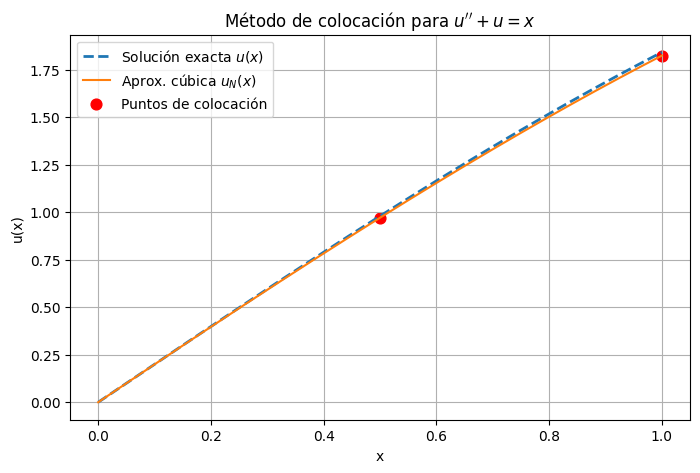

In [6]:
# ======================================================
# 5) Gráfica: exacta vs. aproximación cúbica
# ======================================================

xx = np.linspace(0, 1, 400)
yy_exact = u_exact_num(xx)
yy_aprox = u_aprox_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy_exact, "--", label="Solución exacta $u(x)$", linewidth=2)
plt.plot(xx, yy_aprox, label="Aprox. cúbica $u_N(x)$")
plt.scatter([0.5, 1.0], u_aprox_num(np.array([0.5, 1.0])), s=60, color='red', label="Puntos de colocación")
plt.title("Método de colocación para $u'' + u = x$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

**Interpretación de la Gráfica**

En la gráfica se comparan la solución exacta $u(x)$ y la aproximación polinómica $u_N(x)$ obtenida mediante el método de colacación. Podemos observar que ambas curvas muestran un comportamiento muy similar dentro del intervalo [0,1], lo cual indica que el polinomio ajusta adecuadamente la dinámica del problema diferencial.

Mientras que los puntos resaltados corresponden a los puntos de colocación $x = \frac{1}{2}$ y $x = 1$.

Cálculo del error numérico.

In [7]:
# ======================================================
# 6) Cálculo del error numérico |u(x) - u_N(x)|
# ======================================================

print("Errores en puntos representativos:\n")

for p in [0, 0.5, 1]:
    exact_val = float(u_exact_expr.subs(x, p))
    approx_val = float(u_aprox.subs(x, p))
    error = abs(exact_val - approx_val)

    print(f"x = {p:.2f}")
    print(f"  u_exacta(x)  = {exact_val:.6f}")
    print(f"  u_aprox(x)   = {approx_val:.6f}")
    print(f"  error |u - u_N| = {error:.6e}\n")

# Error máximo en [0,1]
error_fun = sp.lambdify(x, sp.Abs(u_exact_expr - u_aprox), "numpy")
err_vals = error_fun(xx)
err_max = float(err_vals.max())

print(f"Error máximo en [0,1] = {err_max:.6e}")

Errores en puntos representativos:

x = 0.00
  u_exacta(x)  = 0.000000
  u_aprox(x)   = 0.000000
  error |u - u_N| = 0.000000e+00

x = 0.50
  u_exacta(x)  = 0.979426
  u_aprox(x)   = 0.970588
  error |u - u_N| = 8.837303e-03

x = 1.00
  u_exacta(x)  = 1.841471
  u_aprox(x)   = 1.823529
  error |u - u_N| = 1.794157e-02

Error máximo en [0,1] = 1.794157e-02


**Análisis del Error Numérico**

Una vez obtenida la aproximación $u_N(x)$ mediante el método de colocación, vamos a evaluar qué tan cerca se encuentra de la solución exacta. Para ello, se calculan los valores de ambas funciones en distintos puntos del intervalo [0,1]. Posteriormente, se determinó el error absoluto:
$$
\left| u(x) - u_N(x) \right|
$$
Lo cual permite visualizar la diferencia entre el modelo aproximado y la solución real del problema. En la siguiente tabla se presenta la comparación de ambas funciones y el error correspondiente en cada punto evaluado.

In [8]:
# ======================================================
# Tabla de errores en puntos de evaluación
# ======================================================
import pandas as pd

# Puntos donde evaluaremos el error
puntos = np.array([0, 0.25, 0.50, 0.75, 1.0])

# Calculamos los valores y errores
datos = {
    "x": puntos,
    "u_exacta(x)": u_exact_num(puntos),
    "u_aprox(x)": u_aprox_num(puntos),
}

# Convertimos en DataFrame
df = pd.DataFrame(datos)
df["|error| = |u - u_N|"] = np.abs(df["u_exacta(x)"] - df["u_aprox(x)"])
df

,x,u_exacta(x),u_aprox(x),|error| = |u - u_N|
0,0.00,0.000000,0.000000,0.000000
1,0.25,0.497404,0.494485,0.002919
2,0.50,0.979426,0.970588,0.008837
3,0.75,1.431639,1.417279,0.014359
4,1.00,1.841471,1.823529,0.017942


# Conclusión :

El método de colocación nos permitió obtener una aproximación polinómica cúbica de la solución al problema diferencial: $u'' + u = x $ bajo ciertas condiciones iniciales.

Al anular el residuo en los puntos $ x = \frac{1}{2}$ y $ x = 1$, se ajustaron los coeficientes del polinomio, obteniendo una solución aproximada que coincide exactamente con la solución real en dichos puntos.

Además, los errores obtenidos son pequeños, confirmando que el grado cúbico es suficiente para capturar la dinámica del modelo diferencial. Por lo tanto, el método de colocación resulta ser una técnica efectiva para construir aproximaciones precisas a ecuaciones diferenciales cuando se busca un equilibrio entre simplicidad y exactitud.